In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.filter import rolling_avg
from src.car import Car

# GForce

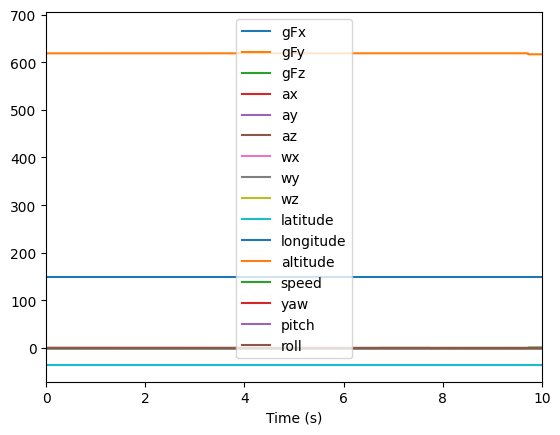

In [3]:
df = pd.read_csv("data/multi_1727599113.076972.csv")
df['time'] = pd.to_datetime(df['time'])  # Convert 'time' to datetime
df['unix_time'] = df['time'].astype(int) / 10**9  # Convert datetime to UNIX timestamp (seconds)
x = df["unix_time"]
x -= x[0]

plt.figure()
for col in df.columns:
    if "time" not in col:
        plt.plot(df['unix_time'],df[col],label=col)

plt.xlabel("Time (s)")
plt.legend()
plt.xlim(0,10)
plt.show()

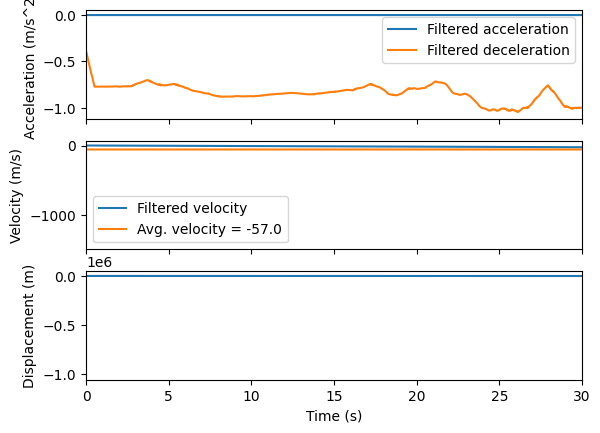

In [25]:
df = pd.read_csv("data/multi_1727651565.83271.csv")
df['time'] = pd.to_datetime(df['time'])  # Convert 'time' to datetime
df['unix_time'] = df['time'].astype(int) / 10**9  # Convert datetime to UNIX timestamp (seconds)
x = np.array(df["unix_time"])
x -= x[0]
y = df["gFx"]+df["gFy"]+df["gFz"]
filtered_y = rolling_avg(y,N=100)
# x = np.linspace(x[0],x[-1],10**6) # Increase timesteps resolution for numerical integration
# filtered_y = np.interp(x,xp=df["unix_time"],fp=filtered_y)
filtered_accel = filtered_y.copy()
filtered_accel[filtered_accel<0]=0
filtered_decel = filtered_y.copy()
filtered_decel[filtered_decel>0]=0
v = np.zeros_like(filtered_y)  # Initialize the velocity array with the same shape as acceleration
v[1:] = np.cumsum(np.diff(x) * (filtered_y[:-1] + filtered_y[1:]) / 2)
# v[1:] = filtered_y[1:]+filtered_y[:-1]
p = np.zeros_like(v)  # Initialize the velocity array with the same shape as acceleration
p[1:] = np.cumsum(np.diff(x) * (v[:-1] + v[1:]) / 2)
# p[1:] = v[1:]+v[:-1]

# plt.plot(x,y,label='Raw acceleration')
fig, axs = plt.subplots(3,1,sharex=True)
axs[0].plot(x,filtered_accel,label='Filtered acceleration')
axs[0].plot(x,filtered_decel,label='Filtered deceleration')
axs[0].legend()
axs[0].set_ylabel("Acceleration (m/s^2)")
axs[1].plot(x,v,label='Filtered velocity')
axs[1].plot(x,np.ones_like(v)*v.mean(),label=f'Avg. velocity = {np.round(v.mean())}')
axs[1].legend()
axs[1].set_ylabel("Velocity (m/s)")
axs[2].plot(x,p,label='Filtered displacement')
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Displacement (m)")
plt.xlim(0,30)
plt.show()

# Filtered Acceleration

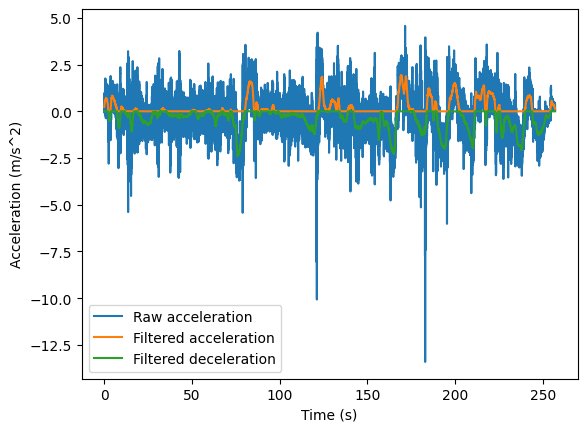

In [21]:
df = pd.read_csv("data/bugden_3km_loop.csv")
x = df["time"]
y = df["ay"]
filtered_y = rolling_avg(y,N=100)
filtered_accel = filtered_y.copy()
filtered_accel[filtered_accel<0]=0
filtered_decel = filtered_y.copy()
filtered_decel[filtered_decel>0]=0

plt.plot(x,y,label='Raw acceleration')
# plt.plot(x,filtered_y,label='Filtered acceleration')
plt.plot(x,filtered_accel,label='Filtered acceleration')
plt.plot(x,filtered_decel,label='Filtered deceleration')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.show()

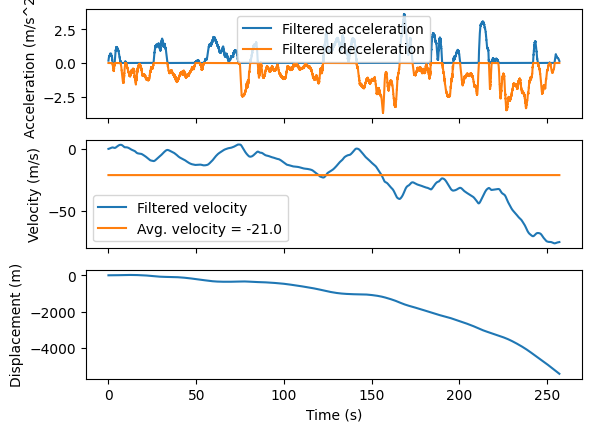

In [3]:
df = pd.read_csv("data/bugden_3km_loop.csv")
x = np.array(df["time"])
y = df["ax"]+df["ay"]+df["az"]
filtered_y = rolling_avg(y,N=100)
x = np.linspace(x[0],x[-1],10**6) # Increase timesteps resolution for numerical integration
filtered_y = np.interp(x,xp=df["time"],fp=filtered_y)
filtered_accel = filtered_y.copy()
filtered_accel[filtered_accel<0]=0
filtered_decel = filtered_y.copy()
filtered_decel[filtered_decel>0]=0
v = np.zeros_like(filtered_y)  # Initialize the velocity array with the same shape as acceleration
v[1:] = np.cumsum(np.diff(x) * (filtered_y[:-1] + filtered_y[1:]) / 2)
# v[1:] = filtered_y[1:]+filtered_y[:-1]
p = np.zeros_like(v)  # Initialize the velocity array with the same shape as acceleration
p[1:] = np.cumsum(np.diff(x) * (v[:-1] + v[1:]) / 2)
# p[1:] = v[1:]+v[:-1]

# plt.plot(x,y,label='Raw acceleration')
fig, axs = plt.subplots(3,1,sharex=True)
axs[0].plot(x,filtered_accel,label='Filtered acceleration')
axs[0].plot(x,filtered_decel,label='Filtered deceleration')
axs[0].legend()
axs[0].set_ylabel("Acceleration (m/s^2)")
axs[1].plot(x,v,label='Filtered velocity')
axs[1].plot(x,np.ones_like(v)*v.mean(),label=f'Avg. velocity = {np.round(v.mean())}')
axs[1].legend()
axs[1].set_ylabel("Velocity (m/s)")
axs[2].plot(x,p,label='Filtered displacement')
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Displacement (m)")
plt.show()

# Fuel Consumption

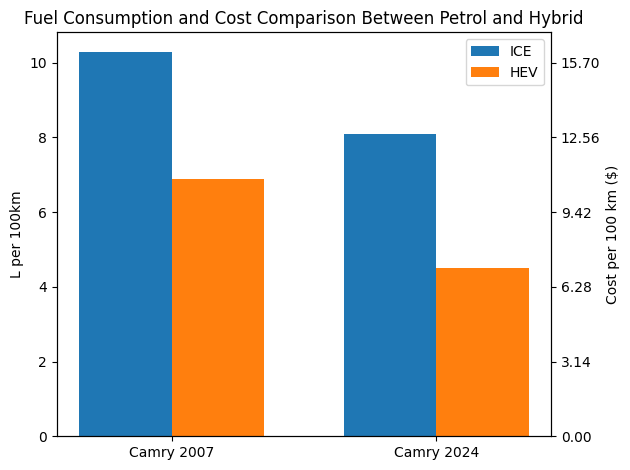

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data
regen = 0.25
solar = 0.8
camry2007 = Car(ice_fuel_consumption=10.3, hybrid_fuel_consumption=6.9, regen_breaking_percentage=regen, solar_charge_percentage=solar)
camry2024 = Car(ice_fuel_consumption=8.1, hybrid_fuel_consumption=4.5, regen_breaking_percentage=regen, solar_charge_percentage=solar)

cars = ['Camry 2007', 'Camry 2024']
ice_costs = [camry2007.ice_fc, camry2024.ice_fc]  # Fuel consumption in L/100km
hev_costs = [camry2007.hev_fc, camry2024.hev_fc]

# Constants
petrol_price = 1.57  # Petrol price in $/L

# Calculate cost per 100 km for ICE and HEV vehicles
ice_cost_per_100km = [cost * petrol_price for cost in ice_costs]
hev_cost_per_100km = [cost * petrol_price for cost in hev_costs]

# Plot
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(cars))

# Create bars for ICE and Hybrid costs side by side
ice_bar = ax.bar(index, ice_costs, bar_width, label='ICE')
hev_bar = ax.bar(index + bar_width, hev_costs, bar_width, label='HEV')

# Labels and title for the left y-axis
ax.set_ylabel('L per 100km')
ax.set_title('Fuel Consumption and Cost Comparison Between Petrol and Hybrid')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cars)
ax.legend()

# Create a secondary y-axis for the cost in $/100km
ax2 = ax.twinx()
ax2.set_ylabel('Cost per 100 km ($)')

# Scale the ticks for the right axis using a transformation
left_ticks = ax.get_yticks()
right_ticks = [tick * petrol_price for tick in left_ticks]

ax2.set_yticks(left_ticks)
ax2.set_yticklabels([f'{tick:.2f}' for tick in right_ticks])

# Ensure that the right axis is properly scaled without explicitly setting its limits
ax2.set_ylim(ax.get_ylim())

# Show plot
plt.tight_layout()
plt.show()


In [15]:
6*1.57

9.42

# Cost per 100km

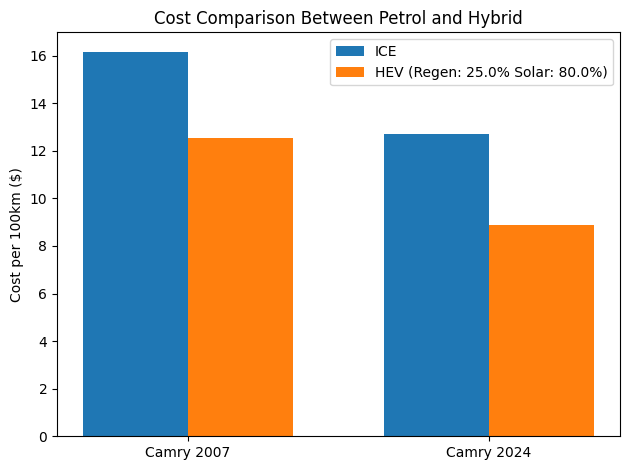

In [5]:
regen = 0.25
solar = 0.8
camry2007 = Car(ice_fuel_consumption=10.3,hybrid_fuel_consumption=6.9, regen_breaking_percentage=regen, solar_charge_percentage=solar)
camry2024 = Car(ice_fuel_consumption=8.1,hybrid_fuel_consumption=4.5, regen_breaking_percentage=regen, solar_charge_percentage=solar)

# Data
cars = ['Camry 2007', 'Camry 2024']
ice_costs = [camry2007.ice_cost_per_100km, camry2024.ice_cost_per_100km]
hev_costs = [camry2007.hev_cost_per_100km, camry2024.hev_cost_per_100km]

# Plot
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(cars))

# Create bars for ICE and Hybrid costs side by side
ice_bar = ax.bar(index, ice_costs, bar_width, label='ICE')
hev_bar = ax.bar(index + bar_width, hev_costs, bar_width, label=f'HEV (Regen: {regen*100}% Solar: {solar*100}%)')

# Labels and title
ax.set_ylabel('Cost per 100km ($)')
ax.set_title('Cost Comparison Between Petrol and Hybrid')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cars)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
